# **Guassian Mixture Model (GMM)**:
A Gaussian Mixture Model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. It's a soft clustering algorithm where each data point has a probability of belonging to each cluster.

Key Components:
1. Multiple Gaussian Distributions
2. Mixing Coefficients (weights)
3. Mean vectors
4. Covariance matrices

Algorithm Steps:
1. Initialize parameters (means, covariances, weights)
2. Expectation Step (E-step): Calculate probabilities of each point belonging to each cluster
3. Maximization Step (M-step): Update parameters based on these probabilities
4. Repeat E and M steps until convergence

Applications:
1. Clustering and segmentation
2. Density estimation and probability modeling
3. Speech recognition and signal processing

Advantages:
1. Flexible and can model complex data distributions
2. Soft assignments allow for overlapping clusters and uncertainty

Disadvantages:
1. Can be sensitive to initialization and local optima
2. Requires more computational resources than simpler algorithms like k-means
3. Interpretation of results can be more complex than hard clustering algorithms

Comparison with k-means:
1. GMM allows for soft assignments and overlapping clusters
2. GMM can model complex data distributions more accurately than k-means
3. GMM is more computationally expensive than k-means
4. GMM can be more sensitive to initialization and local optima than k-means


Metrices for GMM:

1. **Log-likelihood**: 
   - This metric measures how well the Gaussian Mixture Model fits the observed data. 
   - A higher log-likelihood value indicates a better fit of the model to the data.
   - It is calculated by summing the logarithm of the probability of each data point under the model.

2. **AIC (Akaike Information Criterion)**:
   - AIC is used to assess the quality of a model relative to other models.
   - It balances the goodness of fit of the model with its complexity.
   - The formula for AIC is: `AIC = 2k - 2ln(L)`, where `k` is the number of parameters in the model and `L` is the likelihood of the model.
   - Lower AIC values indicate a model that achieves a good fit with fewer parameters.

3. **BIC (Bayesian Information Criterion)**:
   - Similar to AIC, BIC evaluates the trade-off between model fit and complexity.
   - BIC penalizes model complexity more heavily than AIC.
   - The formula for BIC is: `BIC = ln(n)k - 2ln(L)`, where `n` is the number of data points, `k` is the number of parameters, and `L` is the likelihood of the model.
   - A lower BIC value suggests a more parsimonious model with a good balance between fit and complexity.

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate sample data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# Fit GMM model
gmm = GaussianMixture(n_components=4, random_state=0).fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Access model parameters
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

# Print parameters (optional)
print("Means:", means)
print("Covariances:", covariances)
print("Weights:", weights)
print(labels[:10])

Means: [[-1.27617979  7.76207921]
 [ 0.93400014  4.36450124]
 [-1.62515249  2.84520475]
 [ 1.95781368  0.8377989 ]]
Covariances: [[[ 0.28945443  0.01271038]
  [ 0.01271038  0.36544715]]

 [[ 0.36683582 -0.00447302]
  [-0.00447302  0.40094166]]

 [[ 0.37794793  0.02843666]
  [ 0.02843666  0.38494452]]

 [[ 0.34185172 -0.02463781]
  [-0.02463781  0.29790222]]]
Weights: [0.24881629 0.25392865 0.24757933 0.24967573]
[1 2 2 1 2 0 3 1 2 3]


In [2]:
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': 0,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

Log Likelihood -1.4980073602870048
AIC: 483.40220808610144
BIC: 534.5830080857378


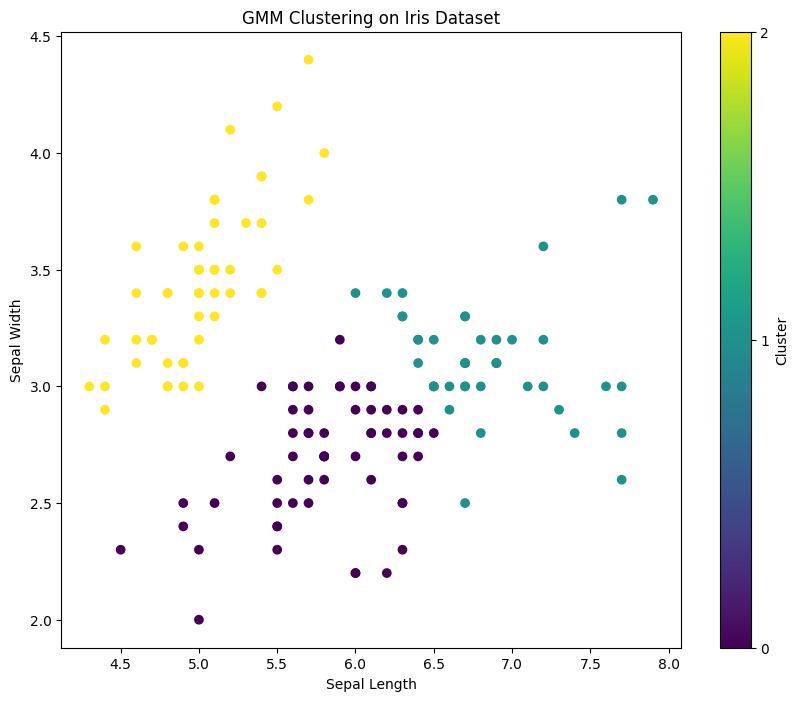

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[: , :2]


# Fit GMM model to Iris dataset

gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=100, random_state=0)
gmm.fit(X)

labels = gmm.predict(X)

log_likelihood = gmm.score(X)
print('Log Likelihood' , log_likelihood)

n_samples , _ = X.shape
aic = gmm.aic(X)
bic = gmm.bic(X)


print('AIC:', aic)
print('BIC:', bic)

#scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(ticks=range(3), label='Cluster')
plt.show()